# Cloning the **damavand** repository

In [1]:
!git clone https://github.com/amirberenji1995/damavand

Cloning into 'damavand'...
remote: Enumerating objects: 263, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (197/197), done.
remote: Total 263 (delta 132), reused 196 (delta 65), pack-reused 0 (from 0)
Receiving objects: 100% (263/263), 6.62 MiB | 16.67 MiB/s, done.
Resolving deltas: 100% (132/132), done.


In [2]:
!pip install -r damavand/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.0/163.0 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully

# Importings

In [1]:
from damavand.damavand.datasets.downloaders import read_addresses, ZipDatasetDownloader
from damavand.damavand.datasets.digestors import SEU
from damavand.damavand.signal_processing.transformations import *
from damavand.damavand.signal_processing.feature_extraction import *
from damavand.damavand.utils import *
import os
import pandas as pd
import numpy as np
import scipy

# Instantiating a downloader object

In [2]:
addresses = read_addresses()
downloader = ZipDatasetDownloader(addresses['SEU'])
downloader.download_extract('SEU.zip', 'SEU/')

# Instantiating a digestor object

In [3]:
seu = SEU('SEU/')
mining_params = {
    'win_len': 10000,
    'hop_len': 10000
}
seu.mine(mining_params)

Mining:  Health_20_0.csv
Mining:  Root_30_2.csv
Mining:  Miss_30_2.csv
Mining:  Root_20_0.csv
Mining:  Miss_20_0.csv
Mining:  Surface_20_0.csv
Mining:  Surface_30_2.csv
Mining:  Health_30_2.csv
Mining:  Chipped_30_2.csv
Mining:  Chipped_20_0.csv
Mining:  outer_20_0.csv
Mining:  comb_20_0.csv
Mining:  health_20_0.csv
Mining:  ball_30_2.csv
Mining:  comb_30_2.csv
Mining:  health_30_2.csv
Mining:  outer_30_2.csv
Mining:  inner_20_0.csv
Mining:  inner_30_2.csv
Mining:  ball_20_0.csv


# Aggregating data over the second channel

In [4]:
df = pd.concat(seu.data[1]).reset_index(drop = True)
df

,0,1,2,3,4,5,6,7,8,9,...,9993,9994,9995,9996,9997,9998,9999,test_bed,state,rot_speed
0,0.008813,-0.006192,0.005939,0.016813,0.002066,0.016346,0.013306,-0.001801,0.005945,-0.002171,...,-0.005212,-0.000072,-0.005836,0.006762,0.010804,0.014676,0.010185,Gear_set,Health,20
1,0.005423,0.004086,0.002605,-0.002048,-0.000333,0.004418,0.007993,0.006566,0.002242,0.007952,...,0.002311,-0.002023,0.002367,0.002530,-0.002308,-0.001899,-0.000598,Gear_set,Health,20
2,0.003530,-0.002198,-0.001231,-0.001452,-0.000398,0.008441,0.003691,-0.003535,0.004591,0.009463,...,0.002589,0.002497,0.003873,0.015830,0.010234,-0.000416,0.005373,Gear_set,Health,20
3,0.008167,0.004586,0.004731,-0.004278,-0.011252,-0.003437,-0.012201,0.000237,0.004898,0.003796,...,0.002348,-0.005813,-0.011439,-0.001320,-0.008225,-0.002196,0.007448,Gear_set,Health,20
4,0.001681,0.006210,0.009668,0.001734,0.009592,0.005008,-0.002534,0.003953,0.006863,-0.000491,...,-0.011886,0.002227,0.001158,-0.007437,-0.007825,0.007242,-0.004482,Gear_set,Health,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,0.004690,0.003175,0.000706,-0.002266,-0.000335,0.000126,0.003114,0.003561,0.003369,0.004345,...,0.002997,0.000696,0.004355,0.000876,0.004166,0.002538,0.002812,Bearing_set,ball,20
2076,-0.000436,0.000293,0.004985,0.001394,0.003667,0.003562,0.004380,0.003843,0.002679,0.001819,...,0.005540,0.001757,0.002246,-0.001831,0.000353,0.003362,0.000786,Bearing_set,ball,20
2077,0.002798,0.005493,0.002176,-0.001878,0.003673,0.001307,-0.001187,0.002478,0.005165,0.004226,...,0.002526,0.002630,0.001738,0.001863,0.001026,0.000129,0.000445,Bearing_set,ball,20
2078,0.002276,0.000391,0.003090,0.003029,0.002033,0.001818,0.000091,0.000380,-0.002043,-0.003357,...,0.003529,0.004483,0.001863,0.002882,0.003272,0.000004,-0.000987,Bearing_set,ball,20


# Signals-Metadata declaration

In [5]:
signals, metadata = df.iloc[:, : - 3], df.iloc[:, - 3 :]
signals

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.008813,-0.006192,0.005939,0.016813,0.002066,0.016346,0.013306,-0.001801,0.005945,-0.002171,...,0.009387,0.001698,-0.014420,-0.005212,-0.000072,-0.005836,0.006762,0.010804,0.014676,0.010185
1,0.005423,0.004086,0.002605,-0.002048,-0.000333,0.004418,0.007993,0.006566,0.002242,0.007952,...,0.007765,0.004016,-0.002347,0.002311,-0.002023,0.002367,0.002530,-0.002308,-0.001899,-0.000598
2,0.003530,-0.002198,-0.001231,-0.001452,-0.000398,0.008441,0.003691,-0.003535,0.004591,0.009463,...,-0.012412,-0.010130,-0.004557,0.002589,0.002497,0.003873,0.015830,0.010234,-0.000416,0.005373
3,0.008167,0.004586,0.004731,-0.004278,-0.011252,-0.003437,-0.012201,0.000237,0.004898,0.003796,...,0.004174,0.000271,-0.005994,0.002348,-0.005813,-0.011439,-0.001320,-0.008225,-0.002196,0.007448
4,0.001681,0.006210,0.009668,0.001734,0.009592,0.005008,-0.002534,0.003953,0.006863,-0.000491,...,-0.011536,-0.007182,0.003451,-0.011886,0.002227,0.001158,-0.007437,-0.007825,0.007242,-0.004482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075,0.004690,0.003175,0.000706,-0.002266,-0.000335,0.000126,0.003114,0.003561,0.003369,0.004345,...,0.002524,-0.000216,0.001526,0.002997,0.000696,0.004355,0.000876,0.004166,0.002538,0.002812
2076,-0.000436,0.000293,0.004985,0.001394,0.003667,0.003562,0.004380,0.003843,0.002679,0.001819,...,0.002059,0.001695,0.003431,0.005540,0.001757,0.002246,-0.001831,0.000353,0.003362,0.000786
2077,0.002798,0.005493,0.002176,-0.001878,0.003673,0.001307,-0.001187,0.002478,0.005165,0.004226,...,0.000304,0.000989,0.002574,0.002526,0.002630,0.001738,0.001863,0.001026,0.000129,0.000445
2078,0.002276,0.000391,0.003090,0.003029,0.002033,0.001818,0.000091,0.000380,-0.002043,-0.003357,...,0.002007,0.000339,-0.000720,0.003529,0.004483,0.001863,0.002882,0.003272,0.000004,-0.000987


In [6]:
metadata

,test_bed,state,rot_speed
0,Gear_set,Health,20
1,Gear_set,Health,20
2,Gear_set,Health,20
3,Gear_set,Health,20
4,Gear_set,Health,20
...,...,...,...
2075,Bearing_set,ball,20
2076,Bearing_set,ball,20
2077,Bearing_set,ball,20
2078,Bearing_set,ball,20


# Signal Processing

## Envelope Extraction

In [7]:
signals_env = env(signals)
signals_env.shape

(2080, 10000)

## FFT

In [8]:
window = scipy.signal.windows.hann(signals_env.shape[1])
freq_filter = scipy.signal.butter(25, [15, 950], 'bandpass', fs = 2000, output='sos')

In [9]:
signals_env_fft = fft(signals_env, freq_filter = freq_filter, window = window)
signals_env_fft.shape

(2080, 5000)

## ZoomedFFT

In [10]:
signals_env_ZoomedFFT = zoomed_fft(signals_env, 0, 750, 1500, 2000, freq_filter = freq_filter, window = window)
signals_env_ZoomedFFT.shape

(2080, 1500)

## STFT

In [11]:
STFT_window = scipy.signal.windows.hann(1000)
STFT_freq_filter = scipy.signal.butter(25, [15, 950], 'bandpass', fs = 2000, output='sos')
signals_env_STFT = stft(signals_env, 1000, 250, STFT_freq_filter, STFT_window)
signals_env_STFT.shape

(2080, 37, 500)

## Statistical Features

In [12]:
# Defining the feature-set to be extracted
features = {'mean': (np.mean, (), {}), 'var': (np.var, (), {}), 'rms': (rms, (), {})}

In [13]:
# Extracting the desired feature-set from time-domain signals
features_df = feature_extractor(signals, features)
features_df

,mean,var,rms
0,0.001029,0.000050,0.007164
1,0.001021,0.000055,0.007467
2,0.000977,0.000052,0.007311
3,0.000963,0.000051,0.007173
4,0.000977,0.000048,0.007005
...,...,...,...
2075,0.000928,0.000005,0.002377
2076,0.000898,0.000005,0.002454
2077,0.000851,0.000006,0.002540
2078,0.000914,0.000005,0.002428


# Visualization

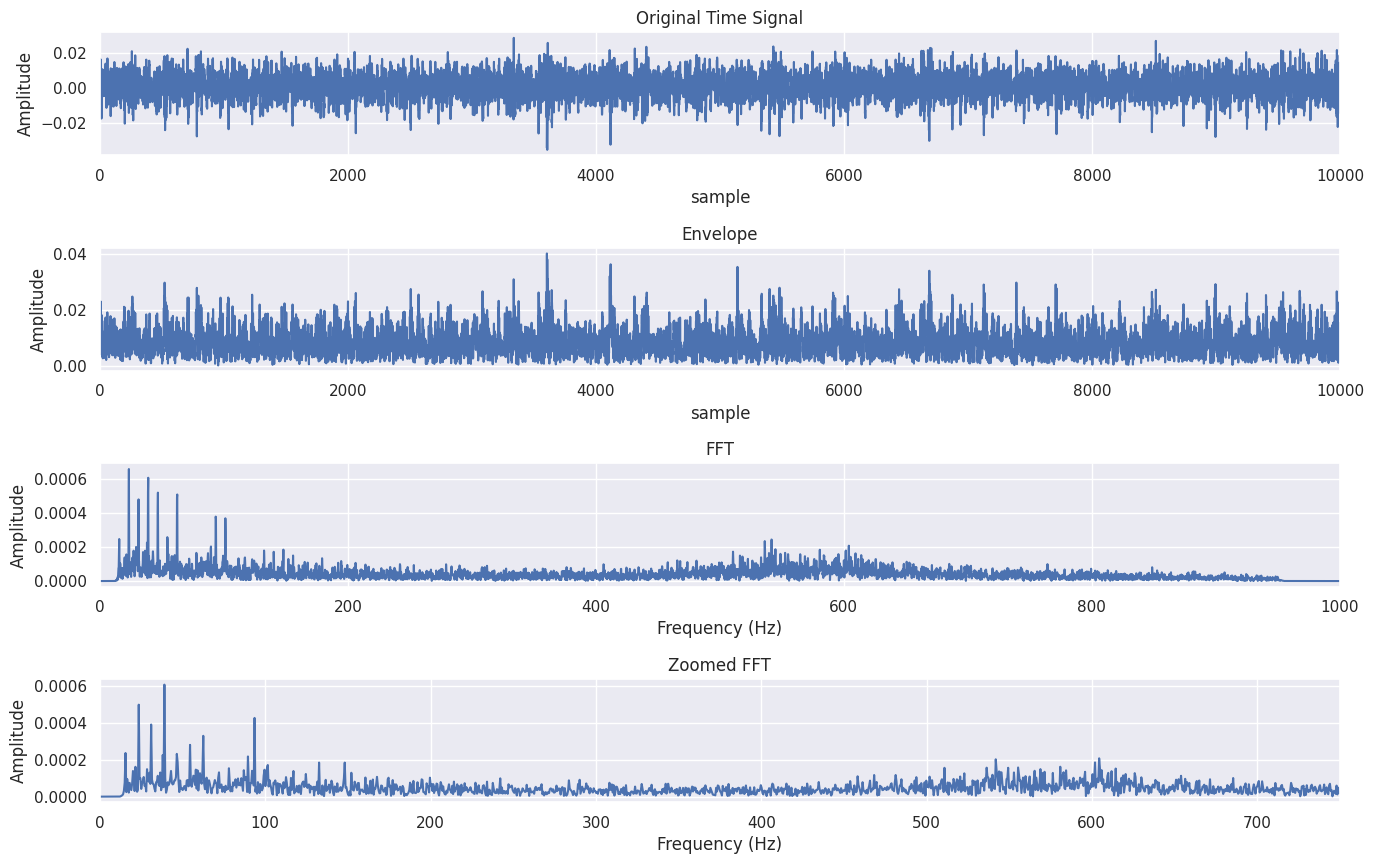

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

fig, axes = plt.subplots(4, 1, figsize = (16, 10))

sns.lineplot(ax=axes[0], x=range(len(signals.iloc[0,:])), y = signals.iloc[0,:])
axes[0].set_title("Original Time Signal")
axes[0].set_ylabel("Amplitude")
axes[0].set_xlabel("sample")
axes[0].set_xlim(0, 10000)

sns.lineplot(ax=axes[1], x=range(len(signals_env.iloc[0,:])), y = signals_env.iloc[0, :])
axes[1].set_title("Envelope")
axes[1].set_ylabel("Amplitude")
axes[1].set_xlabel("sample")
axes[1].set_xlim(0, 10000)


sns.lineplot(ax=axes[2], x = fft_freq_axis(10000, 2000), y = signals_env_fft.iloc[0, :])
axes[2].set_title("FFT")
axes[2].set_ylabel("Amplitude")
axes[2].set_xlabel("Frequency (Hz)")
axes[2].set_xlim(0, 1000)


sns.lineplot(ax=axes[3], x = zoomed_fft_freq_axis(0, 750, 1500), y = signals_env_ZoomedFFT.iloc[0, :])
axes[3].set_title("Zoomed FFT")
axes[3].set_ylabel("Amplitude")
axes[3].set_xlabel("Frequency (Hz)")
axes[3].set_xlim(0, 750)


plt.subplots_adjust(hspace = 0.75)
fig.show()

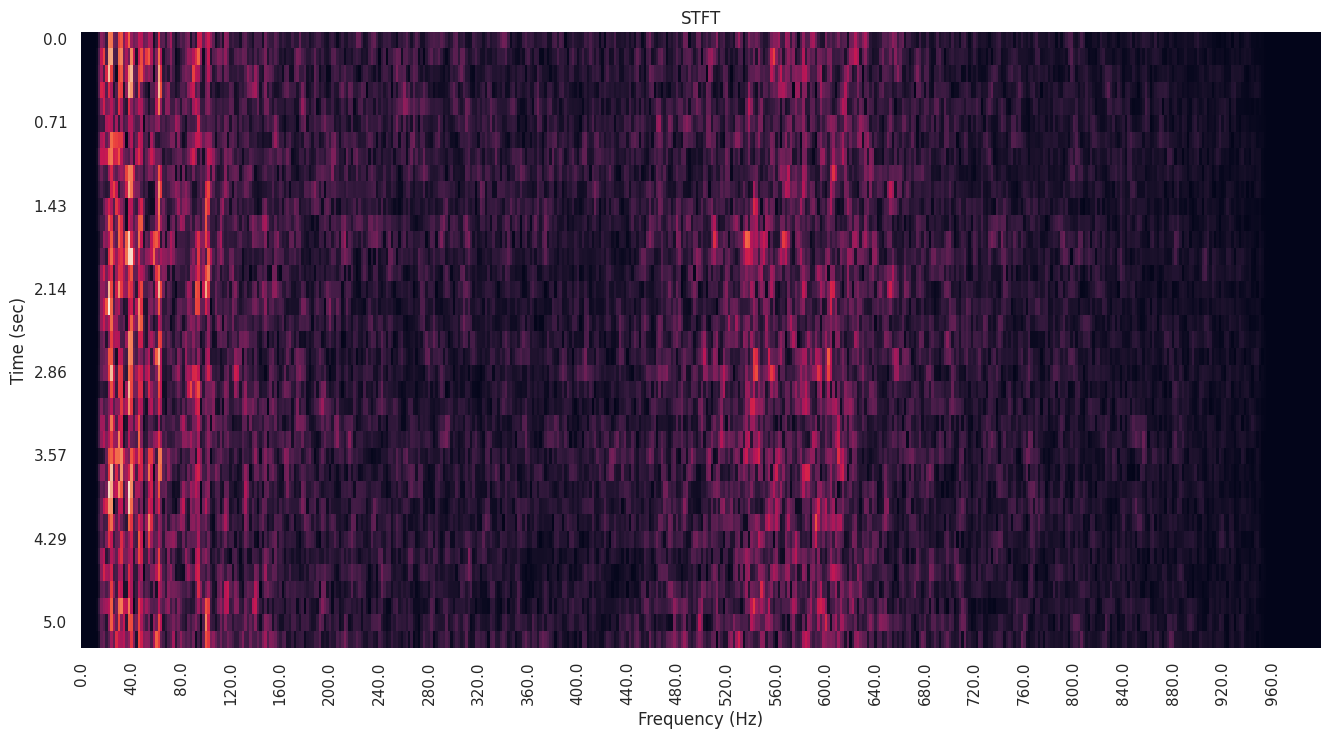

In [15]:
t = np.linspace(0, 5, 36)
f = fft_freq_axis(1000, 2000)

fig, ax = plt.subplots(figsize = (16, 8))

ax = sns.heatmap(signals_env_STFT[0, :, :], xticklabels = np.round(f, decimals = 2), yticklabels = np.round(t, decimals = 2), annot = False, cbar = False)
ax.set(xlabel = 'Frequency (Hz)', ylabel = 'Time (sec)')
ax.set_title('STFT')
ax.set_xticks(ax.get_xticks()[::20])
ax.set_yticks(ax.get_yticks()[::5])


fig.show()